### 【TaskE】Basic practice of sckit-learn(regression)

- student id:111524019
- name：陳品蓁


#### 【Q1】請參考影片內容，對'StudentsPerformance.csv'這組資料集進行Linear Regression的實作，要預測的目標為：writing score
   ##### 1. 數據集中的類別數據，請使用one-hot encoding(多於2個類別) 及 編碼為0/1的方式處理(2個類別) 
   ##### 2. 請輸出y_pred和R平方值，並使用R平方值以外的指標評價此模型
   ####  3. 請找出數據集中，對writing score影響最大的欄位，並探討是如何影響成績 提示: 可搜尋scikit learn 中 coefficient 的用法

#### 【Q1】Please refer to the content of videos to implement Linear Regression on 'StudentsPerformance.csv' data. The target to  predict is: writing score
   ##### 1. Please use one-hot encoding(more than 2 categories) or  coding into 0/1(2 categories) to deal with category data in this data set. 
   ##### 2. Please print y_pred and R-square, and evaluate your model by values different from  R-square  
   #####  3.Please find out which feature in the dataset has the most significant impact and how it impact writing score ? hint: search coefficient in scikit learn

In [1]:
import pandas as pd
import numpy as np

In [2]:
StudentsPerformance=pd.read_csv('StudentsPerformance.csv')
print(StudentsPerformance)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [3]:
race_onehot=pd.get_dummies(StudentsPerformance[["gender","race/ethnicity","parental level of education","lunch","test preparation course","math score","reading score","writing score"]])
race_onehot.head()
#每個特徵裡面有多於兩種分類的特徵就會將分類依照0/1做標記
#例如race/ethnicity(4種),parental level of education(6種)
#math score/reading scor/writing score 因為沒有類別的關係只有數字保留(也沒有多出的欄位)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#writing score 的將目標writing score拿掉
X_writingscore=race_onehot.drop(['writing score'],axis=1).values
y_writingscore=race_onehot[['writing score']].values
X_writingscore
x_train,x_test,y_train,y_test =train_test_split(X_writingscore,y_writingscore,test_size=0.3,random_state=42)
reg_all=LinearRegression()
reg_all.fit(x_train,y_train)
y_pred =reg_all.predict(x_test)
b=reg_all.score(x_test,y_test)
print(b)
#這是R平方值的作法

0.9466134876939077


In [81]:
#MSE 作法
from sklearn.metrics import mean_squared_error
#真實值,預測值
#所有誤差的平方和取平均，越小代表越準確。
#因為對誤差取平方，較容易看出離群的預測值，此評估方式較在乎誤差的大小。
c=mean_squared_error(y_test, y_pred)
print(c)

13.840068339282352


In [82]:
#MAE
from sklearn.metrics import mean_absolute_error
#真實值,預測值
#所有誤差取絕對值後取平均，越小代表越準確。
#求的是誤差離實際值的真實距離，較難看出離群值。
d=mean_absolute_error(y_test,y_pred)
print(d)

3.0722178310111206


In [48]:
reg_all.coef_
#最高的數字是2.95450941

array([[ 0.29772444,  0.64796965,  2.95450941, -2.95450941, -0.50712465,
        -0.1467829 ,  0.53405876,  1.71668527, -1.59683648,  0.11867282,
         1.36073558, -1.32726296,  1.37025416, -0.12974289, -1.3926567 ,
        -0.08919721,  0.08919721,  1.7613025 , -1.7613025 ]])

In [ ]:
y_writingscore

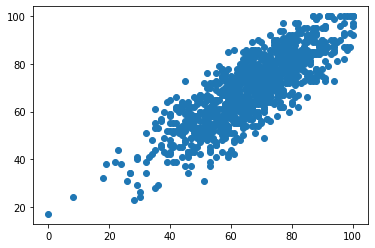

In [91]:
import matplotlib.pyplot as plt
y_readingscore=race_onehot[['reading score']].values
plt.scatter(y_mathscore,y_readingscore)

plt.show()

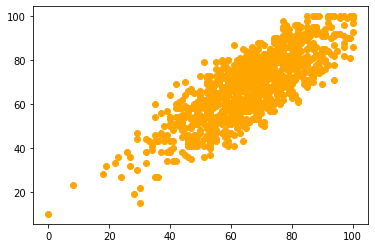

In [95]:
import matplotlib.pyplot as plt
y_mathscore=race_onehot[['math score']].values
plt.scatter(y_mathscore,y_writingscore,color='orange')

plt.show()

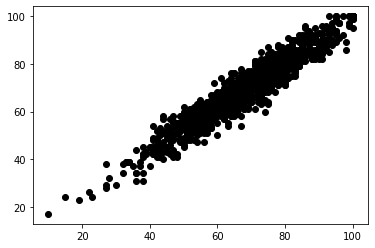

In [96]:
import matplotlib.pyplot as plt
plt.scatter(y_writingscore,y_readingscore,color='black')

plt.show()

In [58]:
reg_all=LinearRegression()
reg_all.fit(y_mathscore,y_writingscore)
y_pred =reg_all.predict(y_mathscore)
reg_all.score(y_mathscore,y_pred)

1.0

#### 【Q2】有沒有什麼方法能使模型的表現能更好呢？(e.g.刪除資料集中某些欄位、使用其他迴歸演算法等等)請實作並證明  

#### 【Q2】Is there anyway to enhance the performance of the model(e.g. delete some columns in the data, using other regression algorithm...) Please implement and prove it.

In [77]:
#使用LogisticRegression建立及訓練模型
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression


X_writingscore=race_onehot.drop('writing score',axis=1).values
y_writingscore=race_onehot['writing score'].values
x_train,x_test,y_train,y_test =train_test_split(X_writingscore,y_writingscore,test_size=0.3,random_state=42)
regr=LogisticRegression()
regr.fit(x_train,y_train)
y_pred =regr.predict(x_test)
a=regr.score(x_test,y_test)
print(a)
#這個模型的分數比原本的還低

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


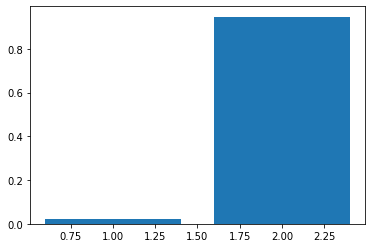

In [85]:
import matplotlib.pyplot as plt
x = [1,2]       
h = [a,b]
plt.bar(x,h)
plt.show()
#這個模型的分數比原本的還低

<ipython-input-87-11d3520a7484>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(x,color='r', marker='o', lineStyle='--', linewidth=2, markersize=6)


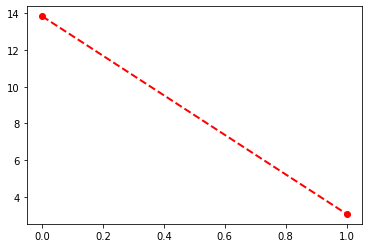

In [87]:
import matplotlib.pyplot as plt
x = [c,d]

plt.plot(x,color='r', marker='o', lineStyle='--', linewidth=2, markersize=6)
plt.show()
#MSE作法 跟 MAE作法